<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [1]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [7]:
missing_percent=df.isnull().sum()/len(df) *100
missing_percent

Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [9]:
missing_percent=missing_percent.reset_index().rename(columns={"index":"column",0:"percent missing"})
missing_percent

column  percent missing
0               Pregnancies         1.822917
1                   Glucose         0.000000
2             BloodPressure         0.000000
3             SkinThickness         1.041667
4                   Insulin         0.000000
5                       BMI         1.302083
6  DiabetesPedigreeFunction         0.000000
7                       Age         0.000000
8                   Outcome         0.000000

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

In [11]:
!pip install missingno

In [13]:
import missingno as msno

<Axes: >

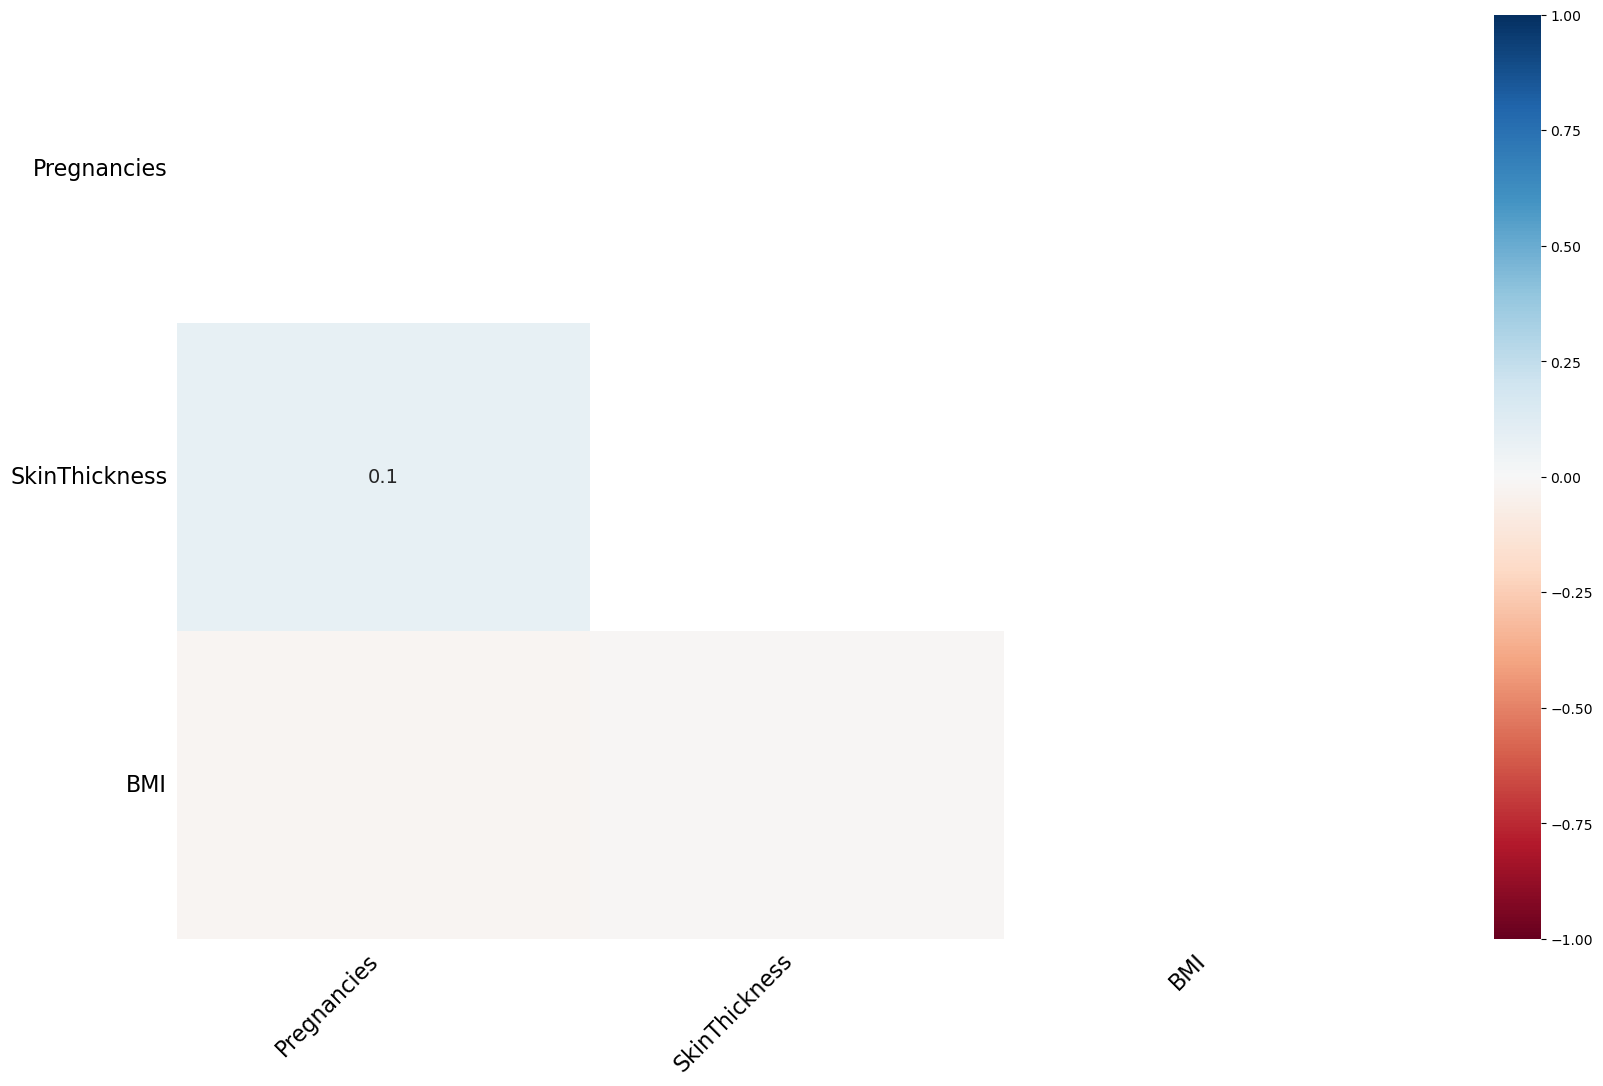

In [17]:
msno.heatmap(df)

<Axes: >

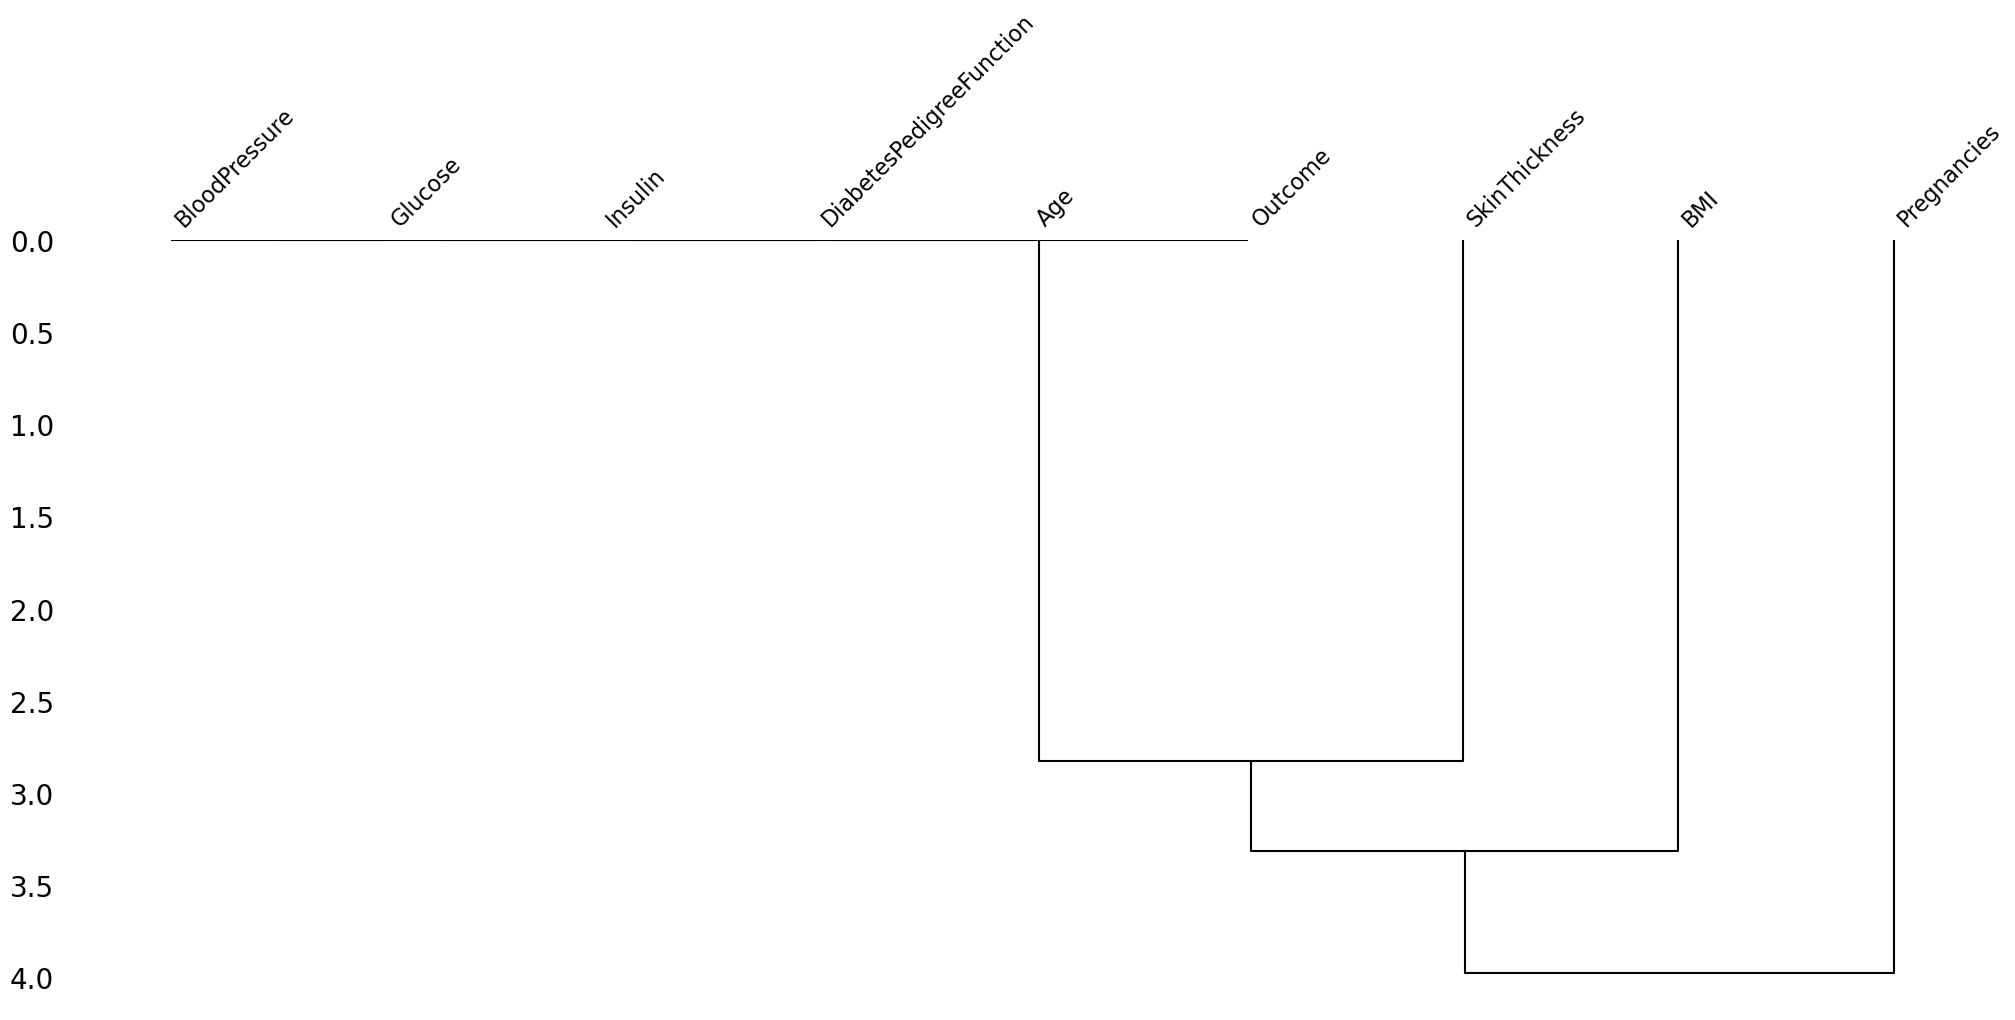

In [19]:
msno.dendrogram(df)

## <font color = 'Orange'>Handle the missing values</font>

In [21]:
df1=df.copy()
df1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148             72           35.0        0  33.6   
1          1.0       85             66           29.0        0  26.6   
2          8.0      183             64            0.0        0  23.3   
3          1.0       89             66           23.0       94  28.1   
4          0.0      137             40           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [23]:
df1.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [25]:
df1=df1.dropna(subset=['SkinThickness'],axis=0)

In [27]:
df1.BMI=df1.BMI.fillna(df1.BMI.mean())

In [29]:
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [30]:
frequent_imputer=SimpleImputer(strategy='most_frequent')

<Axes: xlabel='Pregnancies'>

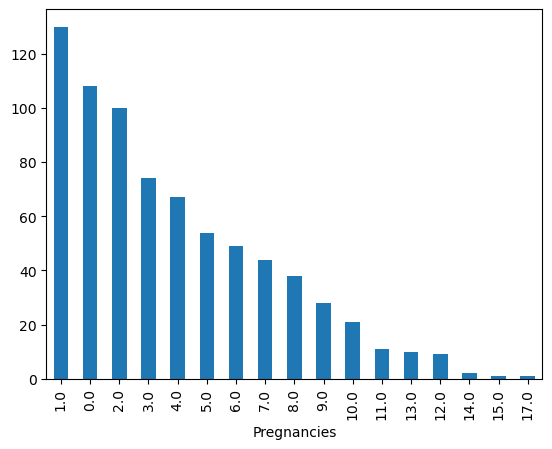

In [33]:
df1['Pregnancies'].value_counts().plot.bar()

In [35]:
df1['Pregnancies']=df1['Pregnancies'].astype(str)
df1['Pregnancies']=frequent_imputer.fit_transform(df1['Pregnancies'].values.reshape(1, -1))[0]

In [37]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [39]:
df1.to_csv('diabetes-final.csv',index=False)

Print the first rows of your final Dataset

In [41]:
df1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         6.0      148             72           35.0        0  33.6   
1         1.0       85             66           29.0        0  26.6   
2         8.0      183             64            0.0        0  23.3   
3         1.0       89             66           23.0       94  28.1   
4         0.0      137             40           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [51]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [63]:
# gi selektirame kolonite samo so se numericki
numeric_df = df1.select_dtypes(include=[np.number])

# proveruva dali ima infinity vrednost za nekoja kolona odnosno null
print((~np.isfinite(numeric_df)).sum())


Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [65]:
#standardiziraj gi  numerickite podatoci
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(numeric_df.drop(columns=['Outcome']))  # ja normalizira df dataframeot bez posledanta kolona koja treba nie da ja predvideme
y = numeric_df['Outcome']  # target kolona koja so ni treba ostanuva nepromeneta

# gi delime pod na 80% trening i 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#0.2 znaci 20%test a random_state=42 znaci deka поделбата на податоците ќе биде иста секој пат кога ќе се покрене кодот

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [72]:
knn=KNeighborsClassifier(n_neighbors=5) #inicijalizacija na knn klasifikatorot
knn.fit(X_train,y_train) #gi trenira modelite na trainx i trany datata

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [74]:
# da gi predvideme vrednostite na testiranata data
y_pred = knn.predict(X_test)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [86]:
# evaulira modelot
accuracy = accuracy_score(y_test, y_pred) #tocnost
print(f"Accuracy: {accuracy * 100:.2f}%") #vo procenti

# presmetuva cuvstvitelnost->brTocnoPredvideniPozitivniSLucai/vrBrojVistinskiPozSlucai
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred) #vr megju 0 i 1 kade pogolemo znaci podobra kombinacija od tocnost i cuvstvitelnost
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) #kolku model gresi i kade gresi  so prikaz na site tocno i netocno predvideni slucai
print("Confusion Matrix:")
print(conf_matrix)

# Classification report (includes precision, recall, F1 score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 76.32%
Recall: 0.54
F1 Score: 0.59
Confusion Matrix:
[[90 14]
 [22 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       104
           1       0.65      0.54      0.59        48

    accuracy                           0.76       152
   macro avg       0.73      0.70      0.71       152
weighted avg       0.76      0.76      0.76       152

